In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
fire = pd.read_excel(r'D:\vscode\RhombusPower\data\fire.xlsx')
singleFire = pd.read_excel(r'D:\vscode\RhombusPower\data\singleFire.xlsx')
assess_value = pd.read_excel(r'D:\vscode\RhombusPower\data\assess_value.xlsx')

In [4]:
to_float = ['PercentContained','Longitude','Latitude']
to_date = ['Updated','Started']
fire[to_float] = fire[to_float].astype('float64')
fire['Updated'] = pd.to_datetime(fire['Updated'], errors='coerce')
fire['Started'] = pd.to_datetime(fire['Started'], errors='coerce')
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              4013 non-null   object        
 1   Updated           4013 non-null   datetime64[ns]
 2   Started           4013 non-null   datetime64[ns]
 3   AdminUnit         3948 non-null   object        
 4   County            3989 non-null   object        
 5   Location          4009 non-null   object        
 6   AcresBurned       4013 non-null   float64       
 7   PercentContained  4013 non-null   float64       
 8   Longitude         4013 non-null   float64       
 9   Latitude          4013 non-null   float64       
 10  Type              2027 non-null   object        
 11  UniqueId          4013 non-null   object        
 12  Url               4013 non-null   object        
 13  StartedDateOnly   0 non-null      float64       
 14  IsActive          4013 n

In [5]:
# miliseconds -> YYYYMMDD

to_date2 = ['Updated', 'Started', 'ExtinguishedDate', 'ExtinguishedDateOnly', 'StartedDateOnly', 'ExpectedContainment']

def date_convert(x):
    if pd.isna(x) or x =="":
        return np.nan
    else:
        return datetime.fromtimestamp(x)

for col in to_date2:
    singleFire[col] = singleFire[col].apply(lambda x: int(x[6:-2])//1000)
    singleFire[col] = singleFire[col].replace(singleFire[singleFire[col] < 0][col].unique(), np.nan)
    singleFire[col] = singleFire[col].apply(date_convert)
singleFire['Name'] = singleFire['Name'].apply(lambda x: x.strip())

### Add Trendline to the fire incidents plot after 2011

In [6]:
fire_copy = fire.__deepcopy__()
fire_copy['year'] = fire_copy['Started'].dt.year
fire_copy['month'] = fire_copy['Started'].dt.month

# fire_copy_2011 contains incidents occured from 2011.

fire_copy_2011 = fire_copy.query("year >= 2011")
fire_copy_2011.head(3)

,Name,Updated,Started,AdminUnit,County,Location,AcresBurned,PercentContained,Longitude,Latitude,Type,UniqueId,Url,StartedDateOnly,IsActive,ExternalUrl,year,month
346,California Tsunami,2011-03-13,2011-03-11,NaN,NaN,California Coast,0.0,100.0,0.0,0.0,NaN,4003b714-a08c-4ab1-8b31-14a89f9c226c,/incidents/2011/3/11/california-tsunami/,NaN,False,NaN,2011,3
347,Center Fire,2011-03-20,2011-03-18,CAL FIRE San Bernardino Unit,Inyo,Community of Big Pine,850.0,100.0,0.0,0.0,NaN,7fe9b77d-2e64-4b32-baca-08ac4e910757,/incidents/2011/3/18/center-fire/,NaN,False,NaN,2011,3
348,Bitterwater Fire,2011-05-02,2011-05-02,CAL FIRE San Luis Obispo Unit,San Luis Obispo,"Bitterwater Road and Bitterwater Valley, 12 mi...",187.0,100.0,0.0,0.0,NaN,9dae1bc1-aa3e-40a1-b132-8a82ed85d17f,/incidents/2011/5/2/bitterwater-fire/,NaN,False,NaN,2011,5


### Fire incidents plot by month

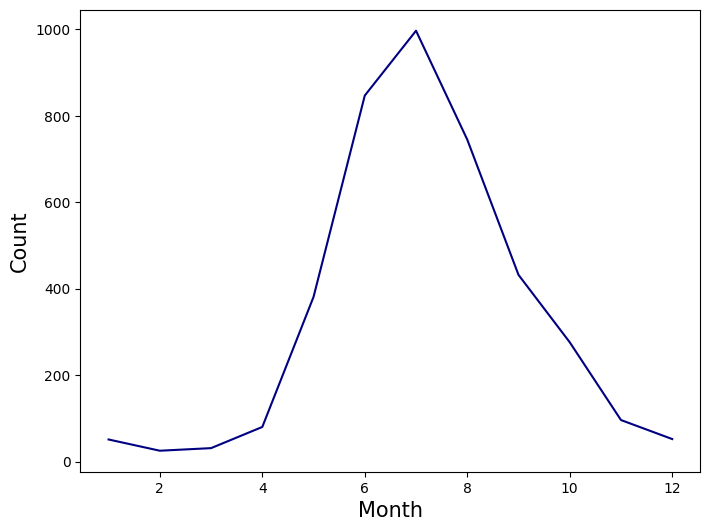

In [7]:
fire_copy = fire.__deepcopy__()

fire_copy['month'] = fire_copy['Started'].dt.month

fire_month = fire_copy.groupby('month')['Name'].count()


plt.figure(figsize=(8,6))
plt.plot(fire_month, color='navy')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Fire incidents by year-month

**I remembered the way using 'apply' function for create 'date' column with 'YY-MM'.**


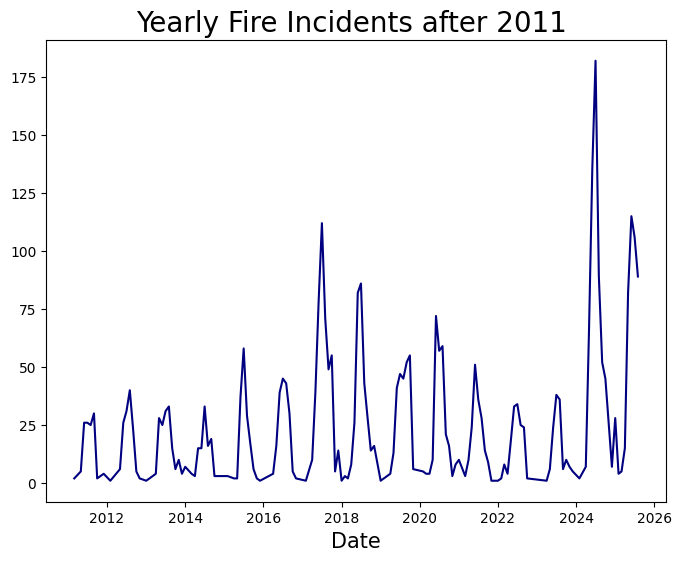

In [44]:
fire_ym = fire_copy_2011.groupby(['year', 'month'])['Name'].count()
fire_ym = fire_ym.reset_index()
fire_ym['date'] = fire_ym.apply(lambda x: datetime(x['year'], x['month'], 1), axis=1)
fire_ym_grouper = fire_copy_2011.groupby(pd.Grouper(key='Started', freq='MS'))['Name'].count()

plt.figure(figsize=(8,6))
plt.plot(fire_ym.date, fire_ym.Name, color='navy')
plt.xlabel('Date', fontsize=15)
plt.title('Yearly Fire Incidents after 2011 ', fontsize=20)
plt.show()

### **Fire incident plot by year-month plus trendline**

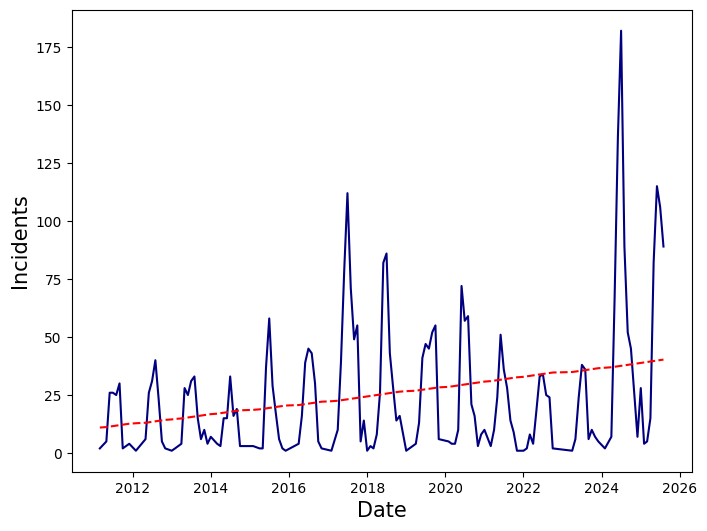

In [ ]:
fire_ym = fire_copy_2011.groupby(['year', 'month'])['Name'].count()
fire_ym = fire_ym.reset_index()
fire_ym['date'] = fire_ym.apply(lambda x: datetime(x['year'], x['month'], 1), axis=1)

x = range(len(fire_ym))
y = fire_ym['Name'].values

degree = np.polyfit(x, y, 1)
p = np.poly1d(degree)

plt.figure(figsize=(8,6))
plt.plot(fire_ym['date'], fire_ym['Name'], color='navy')
plt.plot(fire_ym['date'], p(x), '--', color='red')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Incidents', fontsize=15)
plt.show()

### **Fire incident plot by year-month plus trendline with pd.Grouper**

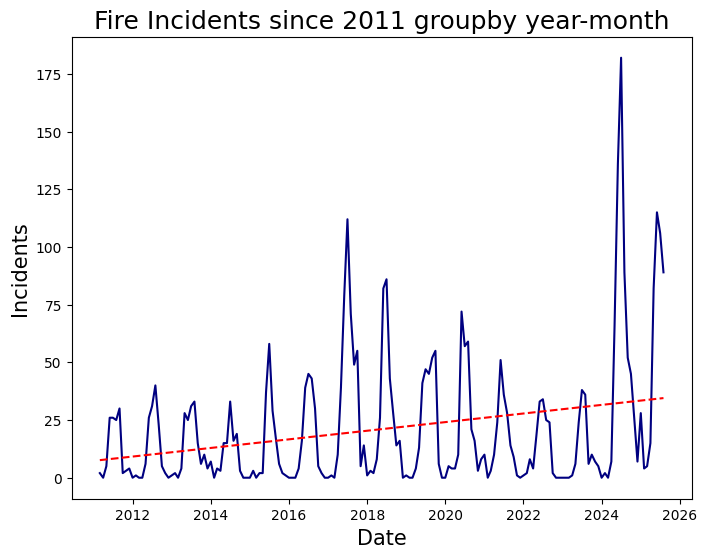

In [ ]:
fire_ym_grouper = fire_ym_grouper.reset_index()

x = range(len(fire_ym_grouper))
y = fire_ym_grouper['Name'].values

degree = np.polyfit(x, y, 1)
p = np.poly1d(degree)

plt.figure(figsize=(8,6))
plt.plot(fire_ym_grouper['Started'], fire_ym_grouper['Name'], color='navy')
plt.plot(fire_ym_grouper['Started'], p(x), '--', color='red')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Incidents', fontsize=15)
plt.title('Fire Incidents since 2011 groupby year-month', fontsize=18)
plt.show()

### Fire incidents plot by year

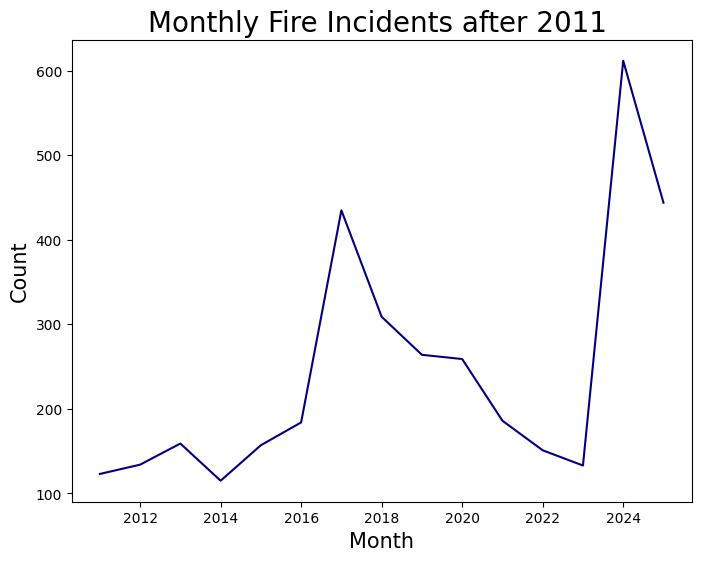

In [43]:
fire_copy_2011['year'] = fire_copy_2011['Started'].dt.year
fire_year = fire_copy_2011.groupby('year')['Name'].count()

plt.figure(figsize=(8,6))
plt.plot(fire_year, color='navy')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Fire Incidents after 2011 ', fontsize=20)
plt.show()